In [6]:
pip install einops

  Using cached einops-0.7.0-py3-none-any.whl (44 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
#2.1 IMAGES Task: 1
import torch
import torchvision
import numpy as np

# Download the MNIST dataset
mnist_dataset = torchvision.datasets.MNIST(root='data/', train=True, transform=torchvision.transforms.ToTensor(), download=True)

# Create a subset of the dataset containing 1000 samples
subset_size = 1000
subset_idx = np.random.choice(len(mnist_dataset), size=subset_size, replace=False)
subset = [mnist_dataset[i] for i in subset_idx]

# Extract the images and labels from the subset
images = [sample[0] for sample in subset]
labels = [sample[1] for sample in subset]

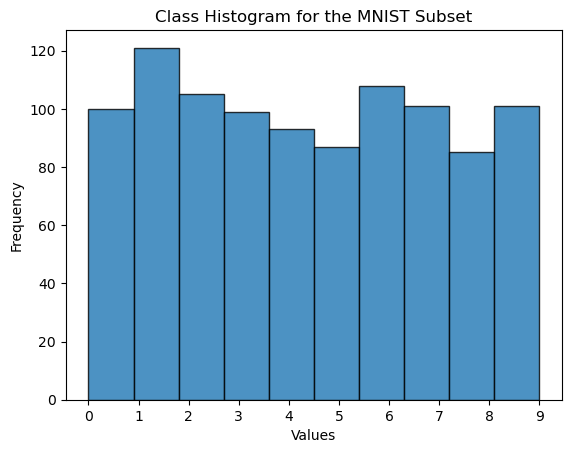

In [8]:
#2.1 IMAGES Task: 2
import matplotlib.pyplot as plt

# Plot the histogram of classes in the subset
plt.hist(labels, bins=10, range=(0, 9), edgecolor='black', alpha=0.8)
plt.xticks(np.arange(0,10))
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title("Class Histogram for the MNIST Subset")
plt.show()


In [9]:
#2.1 IMAGES Task: 3
import einops
import torch
import torchvision
import torchvision.transforms as transforms

In [10]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
indices = torch.randperm(len(trainset))[:1000]  # Randomly select 1000 indices
subset_trainset = torch.utils.data.Subset(trainset, indices)

In [11]:
images = torch.stack([img for img, label in subset_trainset])

In [12]:
batch_size = 25
num_samples = images.shape[0]
num_batches = num_samples // batch_size
if num_samples % batch_size != 0:
    num_batches += 1

batched_images = images.view(num_batches, batch_size, *images.shape[1:]).permute(0, 1, 3, 4, 2)

print(f'Batched Images Shape: {batched_images.shape}')  # should be (40, 25, 28, 28, 1)

Batched Images Shape: torch.Size([40, 25, 28, 28, 1])


In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms

In [14]:
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
indices = torch.randperm(len(trainset))[:1000]  # Randomly select 1000 indices
subset_trainset = torch.utils.data.Subset(trainset, indices)

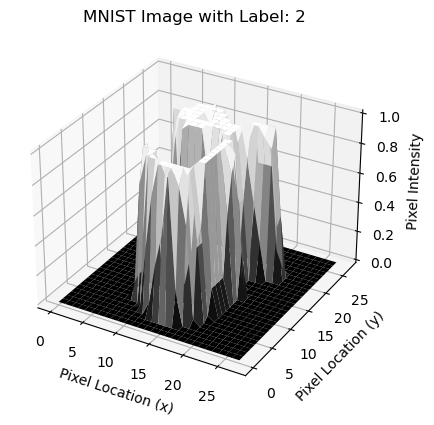

In [15]:
images = np.stack([img.numpy().reshape(-1) for img, label in subset_trainset])
labels = [label for img, label in subset_trainset]

# Select a random image
index = np.random.randint(len(images))
image = images[index].reshape(28, 28)

# Plot the 3D representation of the image
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x, y = np.meshgrid(np.arange(28), np.arange(28))
ax.plot_surface(x, y, image, cmap='gray')
ax.set_title(f'MNIST Image with Label: {labels[index]}')
ax.set_xlabel('Pixel Location (x)')
ax.set_ylabel('Pixel Location (y)')
ax.set_zlabel('Pixel Intensity')
plt.show()

In [26]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv

--2024-02-13 02:02:09--  https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘energydata_complete.csv.1’

energydata_complete     [    <=>             ]  11.42M  18.2MB/s    in 0.6s    

2024-02-13 02:02:10 (18.2 MB/s) - ‘energydata_complete.csv.1’ saved [11979363]



In [27]:
import pandas as pd

df = pd.read_csv('energydata_complete.csv', parse_dates=['date'])

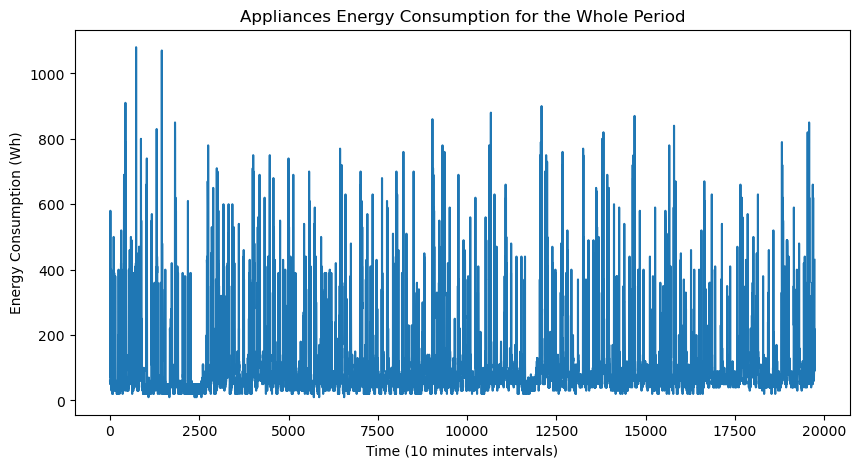

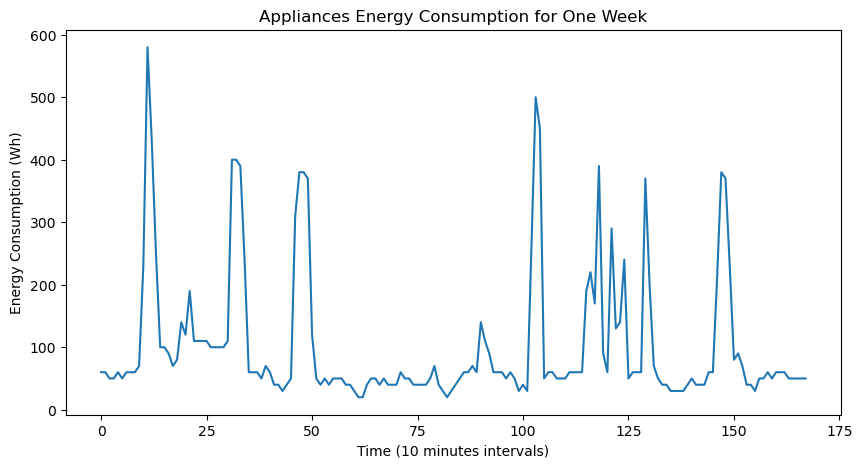

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("energydata_complete.csv")

# Plot the appliances energy consumption for the whole period
plt.figure(figsize=(10,5))
plt.plot(data['Appliances'])
plt.xlabel('Time (10 minutes intervals)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Appliances Energy Consumption for the Whole Period')
plt.show()

# Plot the appliances energy consumption for one week
week = data.iloc[0:168]
plt.figure(figsize=(10,5))
plt.plot(week['Appliances'])
plt.xlabel('Time (10 minutes intervals)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Appliances Energy Consumption for One Week')
plt.show()

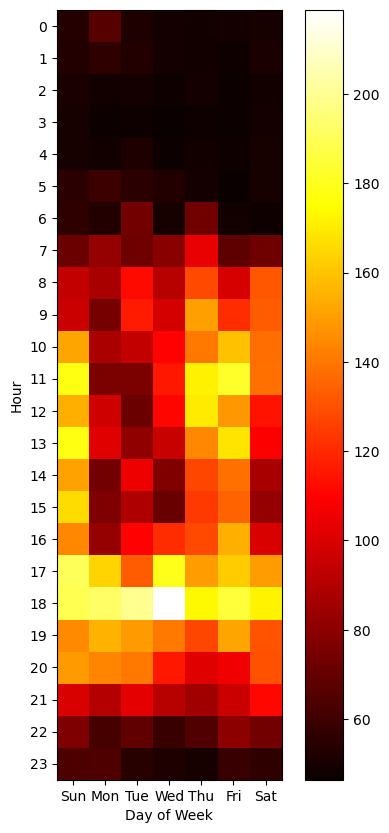

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df = pd.read_csv("energydata_complete.csv")

# Convert the date column to datetime and extract the hour and day of week
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

# Group the data by hour and day of week and take the mean of the appliances column
agg = df.groupby(['hour', 'day_of_week'], as_index=False).mean()

# Pivot the data to create a 2-dimensional array with hours as the rows and days of week as the columns
pivot = agg.pivot(index='hour', columns='day_of_week', values='Appliances')

# Plot the heatmap
plt.figure(figsize=(6,10))
plt.imshow(pivot, cmap='hot')
plt.yticks(range(0,24,1))
xtick_labels = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']  
plt.xticks(range(0,7,1),xtick_labels)
plt.colorbar()
plt.xlabel('Day of Week')
plt.ylabel('Hour')
plt.show()

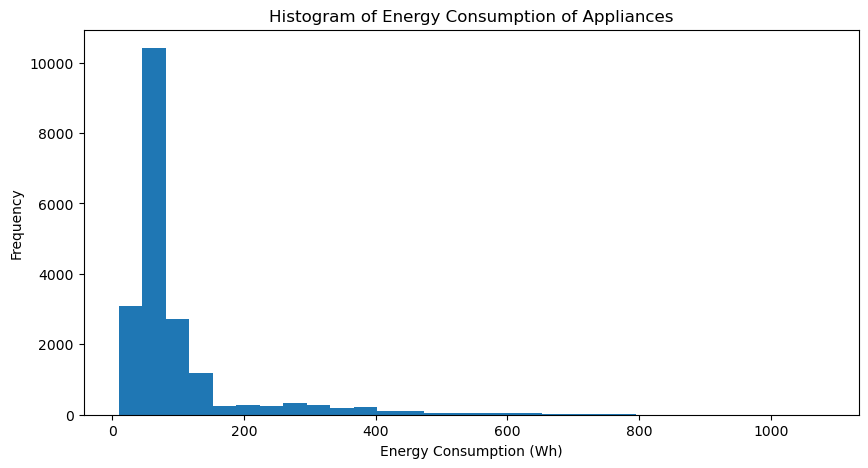

In [30]:
plt.figure(figsize=(10,5))
plt.hist(data['Appliances'], bins=30)
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.title('Histogram of Energy Consumption of Appliances')
plt.show()

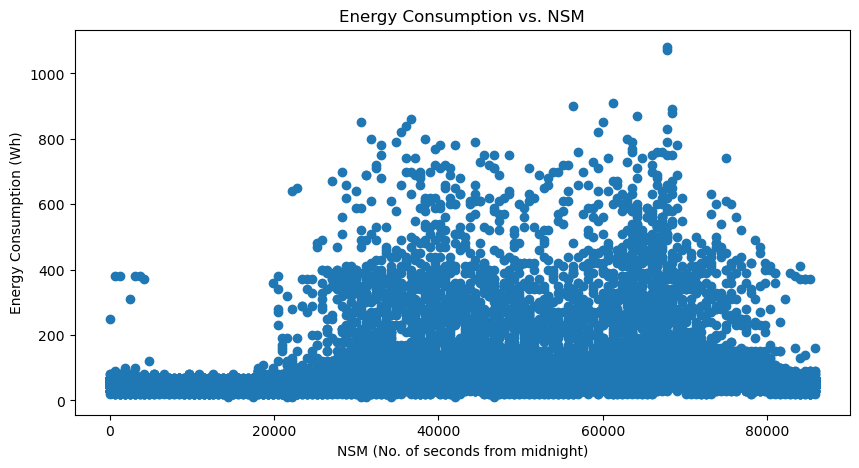

In [31]:
data['date'] = pd.to_datetime(data['date'])

# Create the NSM variable
data['NSM'] = (data['date'].dt.hour * 3600) + (data['date'].dt.minute * 60) + data['date'].dt.second

# Plot the energy consumption vs. NSM
plt.figure(figsize=(10,5))
plt.scatter(data['NSM'], data['Appliances'])
plt.xlabel('NSM (No. of seconds from midnight)')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption vs. NSM')
plt.show()

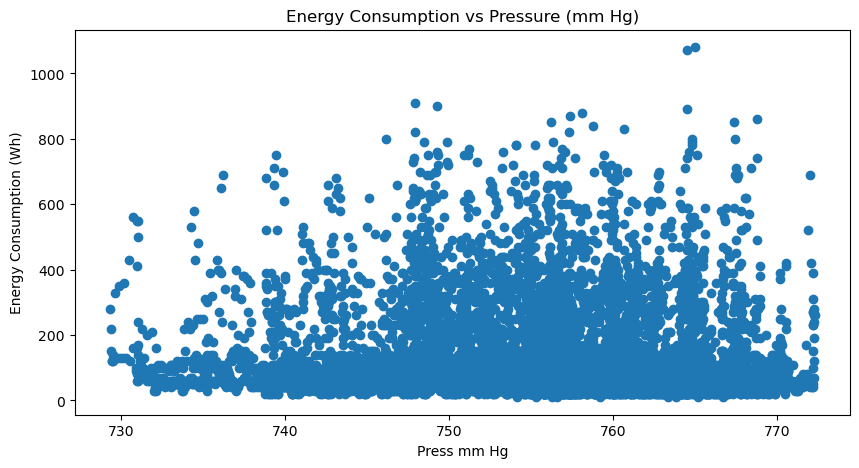

In [32]:
# Plot the energy consumption vs. Press mm Hg
plt.figure(figsize=(10,5))
plt.scatter(data['Press_mm_hg'], data['Appliances'])
plt.xlabel('Press mm Hg')
plt.ylabel('Energy Consumption (Wh)')
plt.title('Energy Consumption vs Pressure (mm Hg)')
plt.show()


In [33]:
#task 2.3

file_path = 'airfoil_self_noise.dat'

# Load the dataset
df = pd.read_csv(file_path, sep='\t', header=None)

# Assign column names
df.columns = ['Frequency', 'Angle of attack', 'Chord length', 'Free-stream velocity', 'Suction side displacement thickness', 'Scaled sound pressure level']

#alculate the descriptive statistics
descriptive_stats = df.describe()

# The describe() method returns count, mean, std (standard deviation), min, 25%, 50%, 75%, max by default.
#calculate the variance, kurtosis, skewness, and range separately.

descriptive_stats.loc['variance'] = df.var()
descriptive_stats.loc['kurtosis'] = df.kurtosis()
descriptive_stats.loc['skewness'] = df.skew()
descriptive_stats.loc['range'] = df.max() - df.min()

# Display the descriptive statistics
descriptive_stats


,Frequency,Angle of attack,Chord length,Free-stream velocity,Suction side displacement thickness,Scaled sound pressure level
count,1.503000e+03,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2.886381e+03,6.782302,0.136548,50.860745,0.011140,124.835943
std,3.152573e+03,5.918128,0.093541,15.572784,0.013150,6.898657
min,2.000000e+02,0.000000,0.025400,31.700000,0.000401,103.380000
25%,8.000000e+02,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1.600000e+03,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4.000000e+03,9.900000,0.228600,71.300000,0.015576,129.995500
max,2.000000e+04,22.200000,0.304800,71.300000,0.058411,140.987000
variance,9.938717e+06,35.024241,0.008750,242.511614,0.000173,47.591463
kurtosis,5.708685e+00,-0.412951,-1.037964,-1.563951,2.218903,-0.314187
